# 📊 Sales Performance Analysis  



### 🔍 This notebook focuses on analyzing the overall sales performance of different products and trends over time.  

## 🔹 We will explore:  
###✅ Analyzing Monthly & Yearly Sales Trends  
###✅ Visualizing Trends Using Line Charts  

## 📂 Load the Dataset  
* We begin by loading the sales dataset to explore its structure and contents.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Data.csv")

# Display the first 5 rows of the dataset
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of To

# 💰 Total Revenue Calculation

In [3]:
# Calculate total revenue from the sales column
Total_Revenue = df["SALES"].sum()
print(Total_Revenue)

9760221.71


# 📈 Sales Trend Analysis  

### 🔍 Understanding sales trends over time helps in identifying **seasonal patterns, growth trends, and sales fluctuations**.  

## 🔹 In this section, we:  
✅ Convert the `ORDERDATE` column to a proper datetime format.  
✅ Extract **Year** and **Month** to analyze trends over time.  
✅ Use a **line plot** to visualize monthly sales patterns across different years.

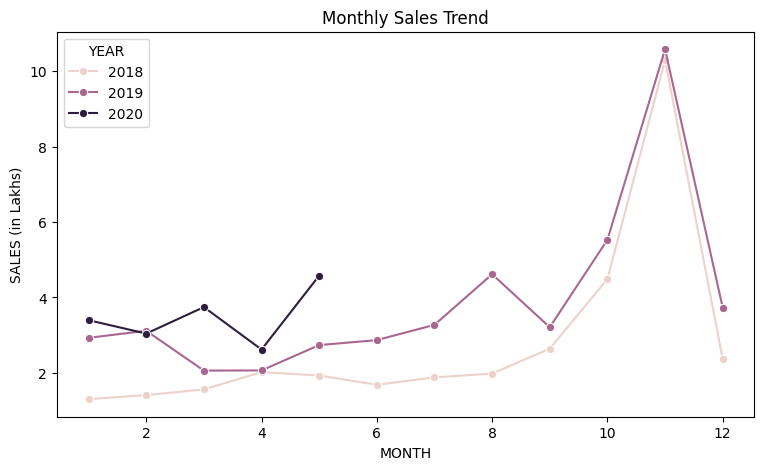

In [4]:
# Analysing Sales Trend

# Convert the ORDERDATE column to datetime format
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], dayfirst=True)

# Extract year and month from the ORDERDATE column
df["YEAR"] = df["ORDERDATE"].dt.year
df["MONTH"] = df["ORDERDATE"].dt.month

# Group sales data by year and month to analyze trends
Sales_Trend = df.groupby(["YEAR", "MONTH"])["SALES"].sum().reset_index()
Sales_Trend["SALES"] = Sales_Trend["SALES"] / 1e5

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(9,5))

# Create a line plot to visualize monthly sales trends
sns.lineplot(data=Sales_Trend, x="MONTH", y="SALES", hue="YEAR", marker="o")

# Add title and labels to the plot
plt.title("Monthly Sales Trend")
plt.xlabel("MONTH")
plt.ylabel("SALES (in Lakhs)")

# Add a legend to differentiate years
plt.legend(title="YEAR")

# Display the plot
plt.show()

# 📆 Yearly Sales Analysis  

##Tracking yearly sales performance helps in understanding **growth trends, business expansion, and revenue patterns over time**.  

### 🔹 In this section, we:  
✅ **Aggregate total sales per year** to analyze long-term trends.  
✅ **Convert sales into lakhs** for better readability.  
✅ **Visualize the trend using a bar chart** to compare yearly performance.

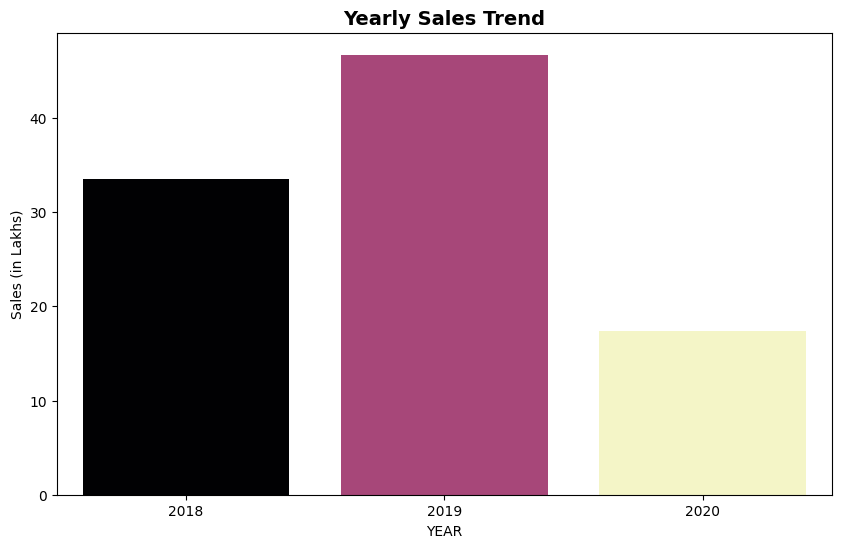

In [9]:
# Calculate yearly sales
Yearly_Sales = df.groupby("YEAR")["SALES"].sum().reset_index()
Yearly_Sales["SALES"] = Yearly_Sales["SALES"] / 1e5

plt.figure(figsize=(10, 6))
sns.barplot(data=Yearly_Sales, x="YEAR", y="SALES", palette="magma", legend=False, hue="YEAR")
plt.title("Yearly Sales Trend", loc="center", fontsize=14, fontweight="bold")
plt.xlabel("YEAR")
plt.ylabel("Sales (in Lakhs)")

plt.show()